# 모듈과 패키지(Module & Package)
## 데이터분석용 라이브러리 정리

### Requests

In [ ]:
import requests

원하는 웹상의 웹페이지 가져오기  
url 이해하기  
url = 프로토콜 + 주소값 + /리소스경로 + ?쿼리스트링


In [ ]:
#네이버 뉴스 페이지에서 코로나 검색결과 페이지 가져오기
url = 'https://search.naver.com/search.naver?query=코로나&where=news&ie=utf8&sm=nws_hty'

resp = requests.get(url) # 데이터 정보 수신 요청
resp # 응답 코드가 출력된다. (200은 성공했다는 뜻 /4~로 시작하면 실패)

<Response [200]>

In [ ]:
print(resp.status_code)
print(resp.url)

200
https://search.naver.com/search.naver?query=%EC%BD%94%EB%A1%9C%EB%82%98&where=news&ie=utf8&sm=nws_hty


In [ ]:
print(resp.content)

b'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="\xec\xbd\x94\xeb\xa1\x9c\xeb\x82\x98 : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\xec\xbd\x94\xeb\xa1\x9c\xeb\x82\x98\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <meta name="description" lang="ko" content="\'\xec\xbd\x94\xeb\xa1\x9c\xeb\x82\x98\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\

In [ ]:
print(resp.text)

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="코로나 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'코로나'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="'코로나'의 네이버 뉴스검색 결과입니다."> <title>코로나 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_200528.css"> <link rel="stylesheet" type="text/css" href="htt

In [ ]:
# 긴 url 처리하기
# 1. 핵심적인 쿼리스트링만 골라낸다.
url = 'https://search.naver.com/search.naver?query=코로나&where=news'

resp = requests.get(url) # 데이터 정보 수신 요청
resp # 응답 코드가 출력된다. (200은 성공했다는 뜻 /4~로 시작하면 실패)

<Response [200]>

In [ ]:
# 긴 url 처리하기
# 2. 쿼리스트링은 딕셔너리로 따로 구분한다.
url = 'https://search.naver.com/search.naver'
params = {'query' : '코로나',
          'where' : 'news'}

resp = requests.get(url, params) # 데이터 정보 수신 요청
resp # 응답 코드가 출력된다. (200은 성공했다는 뜻 /4~로 시작하면 실패)

<Response [200]>

### BeautifulSoup

웹 페이지에서 원하는 데이터 파싱하기  
파싱이란?  
전체에서 일부만 긁어내는 작업  

웹페이지 이해하기  
웹페이지는 HTML 혹은 JSON  
HTML 이면, BeautifulSoup으로 파싱하고,  
JSON이면, 딕셔너리로 변환해서 파싱한다.

HTML 이해하기  
HTML 은 태그들로 이루어져 있다.  
큰 태그 안에 작은 태그가, 작은 태그 안에 더 세부 태그가 감싸져 있는 형태다.  
그런 태그의 계층적인 구조 안에서, 원하는 태그를 골라내는 작업을 하는 것이 핵심이다. 

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
# 파싱이 가능하도록 BeautifulSoup으로 형변환
soup = BeautifulSoup(resp.content, 'lxml')

이제부터 html코드를 tag 단위로 파싱을 할 수 있다.

4) 원하는 태그를 찾는다.

크롤링은 태그 찾기인데,  
원하는 태그들의 공통점 찾기다!!!!!!!!!!!!

1) 태그들의 공통적인 족보(계보)  
2) 태그들의 공통적인 속성  
  
위 두가지를 조합해서,  
찾고자 하는 태그들의 공통점을 찾는 것이 핵심이다!

In [ ]:
#ul.type01 li dl dt a
a_tag = soup.select('ul.type01 li dl dt a') # 이런 태그 전부 다!!! 찾아줘! -> 리스트로 return

a_tag

[<a class=" _sp_each_title" href="https://www.sedaily.com/NewsView/1Z44JJ6M5V" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=88000108_000000000000000003756851&amp;g=011.0003756851&amp;u='+urlencode(this.href));" target="_blank" title="[속보]코로나19 신규 확진자 17명...지역발생 11명">[속보]<strong class="hl">코로나</strong>19 신규 확진자 17명...지역발생 11명</a>,
 <a class=" _sp_each_title" href="http://health.chosun.com/site/data/html_dir/2020/06/22/2020062201380.html" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=3&amp;i=88156f6f_000000000000000000032647&amp;g=346.0000032647&amp;u='+urlencode(this.href));" target="_blank" title="[속보] 코로나 신규 확진 17명… 6월 들어 첫 10명대">[속보] <strong class="hl">코로나</strong> 신규 확진 17명… 6월 들어 첫 10명대</a>,
 <a class=" _sp_each_title" href="https://biz.chosun.com/site/data/html_dir/2020/06/22/2020062200398.html?utm_source=naver&amp;utm_medium=original&amp;utm_campaign=biz" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=5&amp;i=88127058_000000000000000000542821&amp;g=366.0000

In [ ]:
# title을 news_title에 담아보세요.
# 기사 링크를 news_link에 담아보세요.
news_title, news_link = [], []
for a in a_tag:
  news_title.append(a['title'])
  news_link.append(a['href'])
  a.text
news_title, news_link

(['[속보]코로나19 신규 확진자 17명...지역발생 11명',
  '[속보] 코로나 신규 확진 17명… 6월 들어 첫 10명대',
  '전세계 코로나19 신규확진자 사상 최고 경신...18만3000명',
  '"코로나 충격 언제까지"…이달 1~20일 수출 7.5% 감소(상보)',
  '코스피, 코로나19 재확산 우려에 하락…2,130선 등락(종합)',
  '[속보] 코로나 신규 확진자 17명…대전 0명',
  '[속보] 코로나19 신규 확진자 17명…6월 들어 첫 10명대',
  '[속보]코로나19 신규 17명 늘어…지역발생 11명, 해외유입 6명',
  '[속보] 코로나19 신규확진 17명…총 1만2천438명',
  "[단독] '코로나 핑계' 대면·온라인 한번도 수업 안한 교수님"],
 ['https://www.sedaily.com/NewsView/1Z44JJ6M5V',
  'http://health.chosun.com/site/data/html_dir/2020/06/22/2020062201380.html',
  'https://biz.chosun.com/site/data/html_dir/2020/06/22/2020062200398.html?utm_source=naver&utm_medium=original&utm_campaign=biz',
  'https://view.asiae.co.kr/article/2020062209174610700',
  'http://yna.kr/AKR20200622030151002?did=1195m',
  'http://www.hani.co.kr/arti/society/health/950354.html',
  'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202006221012001&code=940601',
  'https://news.joins.com/article/olink/23401709',
  'https://news.imaeil.com/Society/20200622

### Numpy

Numpy는 수치계산을 위해 C언어로 구현된 수치해석용 파이썬 라이브러리입니다. 한마디로, 수치계산이 일반 파이썬보다 훨씬 빠릅니다.    
이름부터가 Numerical Python의 줄임말인 것만 봐도 이 친구의 존재목적을 눈치챌 수 있습니다.  
Numpy는 벡터 및 행렬 연산에 있어서 매우 편리한 기능을 제공합니다.  
  
또한 이 친구는 뒤에서 살펴볼 pandas와 matplotlib의 기반으로 사용되는 녀석이기도 합니다.

In [ ]:
a = [1, 2, 3]
a*3

import numpy as np

a = np.array(a)
a*3

array([3, 6, 9])

In [ ]:
# numpy의 매력 포인트 1. 벡터화 연산을 지원
a = [1, 2, 3]
b = [1, 0, 2]

a = np.array(a)
b = np.array(b)

print(a + b)
print(a*b)
print(a@b)

[2 2 5]
[1 0 6]
7


벡터와 행렬이란?  
- 스칼라 : 숫자 하나를 의미합니다.
- 벡터 : 스칼라 여러개, 즉 숫자 여러개를 의미합니다. 예를 들면, [1, 2, 3, 4, 5] 이런 거  
- 행렬 : 벡터 여러개를 의미합니다.  
예를 들면,  
[[1, 2, 3],  
 [4, 5, 6],  
 [7, 8, 9]]

이러한 수치들을 Numpy는 array(배열)이라는 타입으로 다룹니다.

In [ ]:
import numpy as np

In [ ]:
# 배열만들기
data = np.array([1, 2, 3, 4, 5, 6])
data

array([1, 2, 3, 4, 5, 6])

In [ ]:
print(data.dtype) 
print(data.shape) # 6행 1열(1은 생략한다.) # 1행 6열이 아니라, 6행 1열인 것도 상식으로 알아두자.
print(data.ndim)

int64
(6,)
1


In [ ]:
# 형변환
data = data.astype('f')
print(data, data.dtype)

[1. 2. 3. 4. 5. 6.] float32


In [ ]:
# 무작위 배열 만들기 (무작위 배열만드는 것도 다양한 방법이 존재한다.)
rand_sca = np.random.randn(1) # 스칼라
rand_vec = np.random.randn(10) # 길이 10인 벡터
rand_mat = np.random.randn(5,5) # shape 5 x 5인 행렬
print(rand_sca)
print(rand_vec)
print(rand_mat)

# 다른 무작위 배열 
data_rand = np.random.rand(3, 2) #0~1
print(data_rand)
data_randint = np.random.randint(1, 10, (4, 2)) #1부터 10사이의 숫자, (4행2열)
print(data_randint)

[0.15991272]
[ 0.00154801  0.38236951 -0.27858232  0.62317719  0.23592648 -1.30661633
 -0.84166954 -0.10189958 -0.03195905 -0.17547397]
[[ 1.06221203 -0.11361899  1.05707143 -1.10675216  1.24136555]
 [-0.52993266  0.81293874 -0.14048666  0.10063974  0.14063371]
 [-0.49493925  1.62348392 -0.38528377  0.3670442   0.61190228]
 [ 0.55642889 -0.36578628  0.51019611 -0.08013465  2.14564075]
 [ 1.45764693  1.07675948 -0.3866128   0.70869279  0.39534214]]
[[0.92499216 0.23840992]
 [0.82707264 0.37053574]
 [0.64728027 0.56204623]]
[[6 8]
 [6 3]
 [2 2]
 [1 6]]


In [ ]:
# 0 배열 만들기
zero_mat = np.zeros([5, 5])
zero_like = np.zeros_like(rand_mat)
print(zero_mat)
print(zero_like)

# 1 배열 만들기
one_mat = np.ones([5, 5])
one_like = np.ones_like(rand_mat)
print(one_mat)
print(one_like)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [ ]:
data_arange = np.arange(1, 11) #1부터 10까지 (간격)
data_arange

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
data_lin = np.linspace(1, 10, 10) # 1부터 10까지 10개
data_lin

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
data_lin2 = np.linspace(1, 100, 20)
data_lin2

array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ])

In [ ]:
# 과학적표기법
# 3000을 과학적표기법으로 표현한다면?
3e+15

3000000000000000.0

In [ ]:
data_log = np.logspace(1, 10, 10)
data_log

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

벡터화 연산이 가능하다.  
[1, 2, 3] + [4, 5, 6] = [5, 7, 9]  
[1, 2, 3] * 3 = [3, 6, 9]

In [ ]:
sample_1 = np.array([1, 2, 3])
sample_2 = np.array([4, 5, 6])
print(sample_1 + sample_2)
print(sample_1 * 3)

[5 7 9]
[3 6 9]


In [ ]:
# reshape 
# ex) (10, ) -> (5, 2)
data = np.array([i for i in range(10)])
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
data.reshape([5, 2])

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
data.flatten()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
data.reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [ ]:
data.reshape(-1, 2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
data_2 = np.array([i for i in range(100)])
data_2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
# (100, ) -> ( , 5, 2) = (10, 5, 2)
data_2.reshape(10, -1, 2).shape

(10, 5, 2)

In [ ]:
#Transpose
sample_mat = np.arange(1, 11).reshape(5, 2)
print(sample_mat)
print(sample_mat.T)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
[[ 1  3  5  7  9]
 [ 2  4  6  8 10]]


In [ ]:
# 내적 계산 
sample_mat@sample_mat.T

array([[  5,  11,  17,  23,  29],
       [ 11,  25,  39,  53,  67],
       [ 17,  39,  61,  83, 105],
       [ 23,  53,  83, 113, 143],
       [ 29,  67, 105, 143, 181]])

#### numpy의 두번째 매력 포인트 : 강력한 인덱싱을 지원한다.

In [ ]:
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(data%3 == 0)
data[data%3==0]

[False False  True False False  True False False  True False]


array([3, 6, 9])

### Pandas

In [ ]:
import pandas as pd

# column 만들기
col = pd.Series([1, 2, 3, 4, 5])
col

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
sample_mat@sample_mat.T

array([[  5,  11,  17,  23,  29],
       [ 11,  25,  39,  53,  67],
       [ 17,  39,  61,  83, 105],
       [ 23,  53,  83, 113, 143],
       [ 29,  67, 105, 143, 181]])

In [ ]:
# table 만들기
table = pd.DataFrame(sample_mat@sample_mat.T, columns=['x_1', 'x_2', 'x_3', 'x_4', 'x_5'])
table

,x_1,x_2,x_3,x_4,x_5
0,5,11,17,23,29
1,11,25,39,53,67
2,17,39,61,83,105
3,23,53,83,113,143
4,29,67,105,143,181


In [ ]:
df = pd.DataFrame([1, 2, 3], columns=['num'], index=['hanguk', 'janpan', 'china'])
df

,num
hanguk,1
janpan,2
china,3


In [ ]:
#    name  age
# 1 ardino  20 
# 2 onds
# 3 wonjae
# 4 lc

data = [['ardino', 20, 'male'], ['onds', 21, 'male'], ['lwj', 28, 'male'], ['원재', 35, 'male'], ['수현', 20, 'female'],
        ['종현', 24, 'male'], ['종우', 25, 'male'], ['소희', 27, 'female'], ['예지', 22, 'female'], ['아영', 24, 'female']]

col = ['name', 'age', 'sex']
index = ['{}번'.format(i) for i in range(1, 11)]

df_info = pd.DataFrame(data, columns=col, index=index)
df_info

,name,age,sex
1번,ardino,20,male
2번,onds,21,male
3번,lwj,28,male
4번,원재,35,male
5번,수현,20,female
6번,종현,24,male
7번,종우,25,male
8번,소희,27,female
9번,예지,22,female
10번,아영,24,female


In [ ]:
# 특정 컬럼 조회(지칭)
print(df_info['name'])

1번     ardino
2번       onds
3번        lwj
4번         원재
5번         수현
6번         종현
7번         종우
8번         소희
9번         예지
10번        아영
Name: name, dtype: object


In [ ]:
# 여러 컬럼 조회 # 컬럼을 조회하고 싶다면, 열이름 리스트로 조회한다.
print(df_info[['name', 'sex']])

       name     sex
1번   ardino    male
2번     onds    male
3번      lwj    male
4번       원재    male
5번       수현  female
6번       종현    male
7번       종우    male
8번       소희  female
9번       예지  female
10번      아영  female


In [ ]:
cols = list(df_info)
cols # 컬럼명 리스트

['name', 'age', 'sex']

In [ ]:
cols.insert(1, cols.pop())
cols

['name', 'sex', 'age']

In [ ]:
df_info[cols]

,name,sex,age
1번,ardino,male,20
2번,onds,male,21
3번,lwj,male,28
4번,원재,male,35
5번,수현,female,20
6번,종현,male,24
7번,종우,male,25
8번,소희,female,27
9번,예지,female,22
10번,아영,female,24


In [ ]:
# 특정 행 조회(지칭)
df_info.loc['1번'] 

name    ardino
age         20
sex       male
Name: 1번, dtype: object

In [ ]:
df_info.loc['1번':'6번']

,name,age,sex
1번,ardino,20,male
2번,onds,21,male
3번,lwj,28,male
4번,원재,35,male
5번,수현,20,female
6번,종현,24,male


In [ ]:
df_info[:5]

,name,age,sex
1번,ardino,20,male
2번,onds,21,male
3번,lwj,28,male
4번,원재,35,male
5번,수현,20,female


In [ ]:
df_info.iloc[1:5] # 1, 2, 3, 4 행이 뽑히는 것

,name,age,sex
2번,onds,21,male
3번,lwj,28,male
4번,원재,35,male
5번,수현,20,female


In [ ]:
df_info.head(3)

,name,age,sex
1번,ardino,20,male
2번,onds,21,male
3번,lwj,28,male


In [ ]:
df_info.tail(3)

,name,age,sex
8번,소희,27,female
9번,예지,22,female
10번,아영,24,female


In [ ]:
df_info[:3]

,name,age,sex
1번,ardino,20,male
2번,onds,21,male
3번,lwj,28,male


In [ ]:
df_info[-3:]

,name,age,sex
8번,소희,27,female
9번,예지,22,female
10번,아영,24,female


#**열 조회는 열이름 리스트로,**  
#**행 조회는 슬라이싱으로**

In [ ]:
df_info.to_csv('sample.csv')

In [ ]:
df_sample = pd.read_csv('sample.csv')
df_sample

,Unnamed: 0,name,age,sex
0,1번,ardino,20,male
1,2번,onds,21,male
2,3번,lwj,28,male
3,4번,원재,35,male
4,5번,수현,20,female
5,6번,종현,24,male
6,7번,종우,25,male
7,8번,소희,27,female
8,9번,예지,22,female
9,10번,아영,24,female


In [ ]:
df_sample = df_sample.set_index('Unnamed: 0')
df_sample

,name,age,sex
Unnamed: 0,,,
1번,ardino,20,male
2번,onds,21,male
3번,lwj,28,male
4번,원재,35,male
5번,수현,20,female
6번,종현,24,male
7번,종우,25,male
8번,소희,27,female
9번,예지,22,female


In [ ]:
df_info.to_csv('sample2.csv', index=False)

In [ ]:
df_sample2 = pd.read_csv('sample2.csv')
df_sample2

df_sample2.to_csv('sample3.csv')
df_sample2

,name,age,sex
0,ardino,20,male
1,onds,21,male
2,lwj,28,male
3,원재,35,male
4,수현,20,female
5,종현,24,male
6,종우,25,male
7,소희,27,female
8,예지,22,female
9,아영,24,female


In [ ]:
df_sample3 = pd.read_csv('sample3.csv')
df_sample3

,Unnamed: 0,name,age,sex
0,0,ardino,20,male
1,1,onds,21,male
2,2,lwj,28,male
3,3,원재,35,male
4,4,수현,20,female
5,5,종현,24,male
6,6,종우,25,male
7,7,소희,27,female
8,8,예지,22,female
9,9,아영,24,female


In [ ]:
df_sample2.to_csv('sample4.csv', index=False)

df_sample4 = pd.read_csv('sample4.csv', index_col=['name'])

In [ ]:
df_sample4

,age,sex
name,,
ardino,20,male
onds,21,male
lwj,28,male
원재,35,male
수현,20,female
종현,24,male
종우,25,male
소희,27,female
예지,22,female



### Matplotlib

기본적인 시각화 기능 제공

In [ ]:
from matplotlib import pyplot as plt

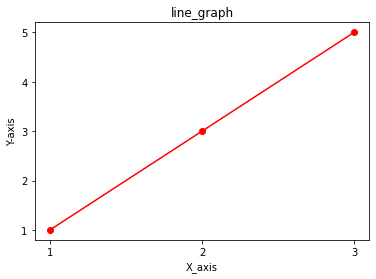

In [ ]:
# 선 그래프 그리기
x_values = [1, 2, 3]
y_values = [1, 3, 5]
plt.plot(x_values, y_values, 'o-', c='red')
plt.title('line_graph')
plt.xlabel('X_axis')
plt.ylabel('Y-axis')
plt.xticks([1, 2, 3])
plt.yticks([1, 2, 3, 4, 5])
plt.show()

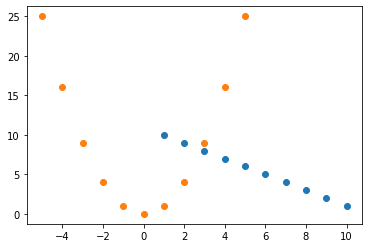

In [ ]:
# plt.scatter([0, 3], [1, 2])
# 10개의 점을 찍고 싶다면?
# x 10개, y 10개
x = np.arange(1, 11)
y = np.arange(10, 0, -1)
plt.scatter(x, y)

# y = x**2을 지나는 점 11개를 찍고 싶다면?
x = np.arange(-5, 6, 1)
y = x**2
x, y

plt.scatter(x, y)
plt.show()

In [ ]:
plt.plot?

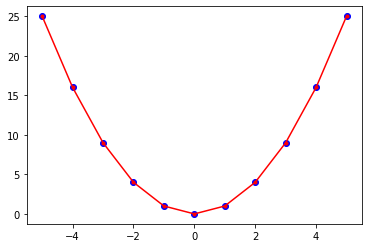

In [ ]:
plt.plot(x, y, c='r', marker='o', ms=3)
plt.scatter(x, y, c='blue')
plt.show()

In [ ]:
# 히스토그램
df_sample = pd.read_csv('sample.csv')
cols = list(df_sample)[1:]
df_sample = df_sample[cols]
df_sample

,name,age,sex
0,ardino,20,male
1,onds,21,male
2,lwj,28,male
3,원재,35,male
4,수현,20,female
5,종현,24,male
6,종우,25,male
7,소희,27,female
8,예지,22,female
9,아영,24,female


(array([6., 3., 1.]), array([20., 25., 30., 35.]), <a list of 3 Patch objects>)

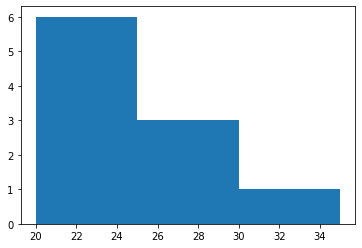

In [ ]:
plt.hist(df_sample['age'], bins=3)

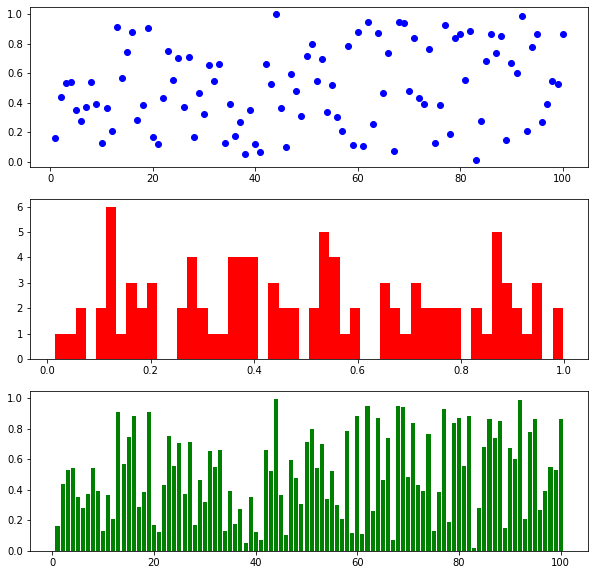

In [ ]:
# 다양한 그래프 그리기
x_data = np.arange(1, 101)
y_data = np.random.rand(100)
plt.figure(figsize=[10,10])
plt.subplot(311) # 3행 1열의 1번째
plt.scatter(x_data, y_data, c='b') # 산점도 점 그래프
plt.subplot(312)
plt.hist(y_data, bins=50, color='r')
plt.subplot(313)
plt.bar(x_data, y_data, color='g')
plt.show()

### Seaborn

세련된 시각화

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_info

,name,age,sex
1번,ardino,20,male
2번,onds,21,male
3번,lwj,28,male
4번,원재,35,male
5번,수현,20,female
6번,종현,24,male
7번,종우,25,male
8번,소희,27,female
9번,예지,22,female
10번,아영,24,female


Text(0, 0.5, 'Frequency')

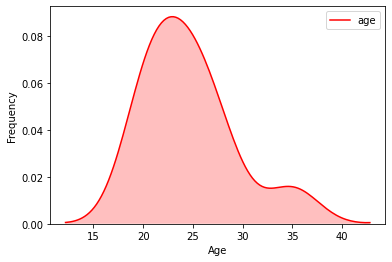

In [ ]:
g = sns.kdeplot(df_info["age"], color="Red", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


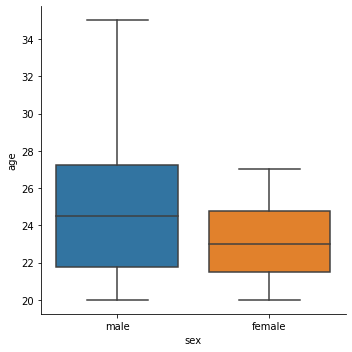

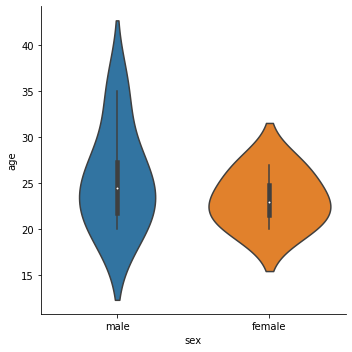

In [ ]:
sns.factorplot(x='sex', y='age', data=df_info, kind='box')
sns.factorplot(x='sex', y='age', data=df_info, kind='violin') # strip swarm

### Sklearn

딥러닝을 제외한 전반적인 머신러닝의 Generalist

In [ ]:
# 사용할 머신러닝 모델 및 필요한 기능 불러오기
from sklearn.datasets import load_wine

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

wine_data = load_wine()
wine_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
wine_data['data'].shape

(178, 13)

In [ ]:
wine_data['target'].shape

(178,)

In [ ]:
df_wine_x = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_wine_x.shape

(178, 13)

In [ ]:
df_wine_y = pd.DataFrame(wine_data.target, columns=['target'])
df_wine_y.shape

(178, 1)

In [ ]:
df_wine = pd.concat([df_wine_x, df_wine_y], axis=1)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_wine_x, df_wine_y)

In [ ]:
LogisticRegression?

In [ ]:
# 1. 모델 선언
logistic = LogisticRegression()
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

In [ ]:
# 2. 모델 학습
logistic.fit(x_train, y_train)
svc.fit(x_train, y_train)
tree.fit(x_train, y_train)
forest.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#3. 모델 검증
print('로지스틱리그레션:', logistic.score(x_test, y_test))
print('서포트벡터머신:', svc.score(x_test, y_test))
print('디시젼트리:', tree.score(x_test, y_test))
print('랜덤포레스트:', forest.score(x_test, y_test))

로지스틱리그레션: 0.9333333333333333
서포트벡터머신: 0.7111111111111111
디시젼트리: 0.8666666666666667
랜덤포레스트: 1.0


In [ ]:
#4. 학습 결과 확인
logistic.coef_.shape, logistic.intercept_.shape

((3, 13), (3,))

In [ ]:
logistic.coef_

array([[-0.13806779,  0.26542917,  0.16666571, -0.30125303, -0.00804052,
         0.21291157,  0.51795108, -0.02341938,  0.09810525, -0.07027527,
        -0.01562668,  0.40749505,  0.00736913],
       [ 0.50817917, -0.80489417, -0.16346565,  0.19451207,  0.01275001,
         0.19419516,  0.30043365,  0.03745306,  0.21694708, -1.03990783,
         0.24877031,  0.23134048, -0.00855864],
       [-0.37011138,  0.53946499, -0.00320006,  0.10674096, -0.00470949,
        -0.40710673, -0.81838473, -0.01403368, -0.31505233,  1.11018309,
        -0.23314362, -0.63883553,  0.00118951]])

In [ ]:
#5. 직접 예측
pred = logistic.predict(x_test)
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1,
       1])

In [ ]:
real = np.array(y_test).flatten()
real

array([1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1,
       1])

In [ ]:
np.equal(pred, real).astype('i').mean()

0.9333333333333333

### Tensorflow

Keras를 흡수하고 더욱 강력해진 딥러닝의 Specialist

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets, layers, models

In [ ]:
fashion = datasets.fashion_mnist
fashion_data = fashion.load_data()
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_data 

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# train_imgs[0]

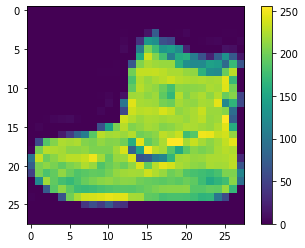

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.show()

In [ ]:
train_imgs.shape, train_labels.shape, test_imgs.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# 1. 모델 구축
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [ ]:
784*512 + 512

401920

In [ ]:
512*256 + 256

131328

In [ ]:
256*128 + 128

32896

In [ ]:
128*10 + 10

1290

In [ ]:
# model = models.Sequential()
# model.add()

In [ ]:
#2. 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#3. 모델 학습
model.fit(train_imgs, train_labels, epochs=3, batch_size=100) 

Epoch 1/3
600/600 [==============================] - 10s 17ms/step - loss: 0.9988 - accuracy: 0.7916
Epoch 2/3
600/600 [==============================] - 10s 17ms/step - loss: 0.4094 - accuracy: 0.8517
Epoch 3/3
600/600 [==============================] - 10s 17ms/step - loss: 0.3695 - accuracy: 0.8649


In [ ]:
#4. 모델 검증
test_loss, test_acc = model.evaluate(test_imgs,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.4091 - accuracy: 0.8534

테스트 정확도: 0.8533999919891357
